> __Purpose:__ This NB tests a given Local model and visualizes the train/test curves to investigate over/under-fitting

In [1]:
import pandas as pd
#import numpy as np
#import random
#np.random.seed(42) 
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import KFold
#from sklearn.cross_decomposition import CCA
#from sklearn.decomposition import PCA

from moments_engr import *
from agglo_model_clust import *
from DNN_FT_funcs import *
from DNN_AMC_funcs import *
from hyperparam_tuned_configs import *


In [2]:
MODEL_STR = "DynamicMomonaNet"
MY_CONFIG = DynamicMomonaNet_config
NUM_LOCAL_MODELS = 15

expdef_df = load_expdef_gestures(apply_hc_feateng=False)
all_participants = list(expdef_df['Participant'].unique())


In [3]:
# Choosing NUM_LOCAL_MODELS somewhat arbitrarily, don't need to look at all 32 results... save some computation ig
# Setting num_gesture_training_trials=3 so that this replicates finetuning data used for local
# num_gesture_ft_trials should not be used I don't think, not in main_training_pipeline anyways
data_splits = make_data_split(expdef_df, num_gesture_training_trials=3, num_gesture_ft_trials=3, num_train_users=NUM_LOCAL_MODELS)


In [4]:

res_dict_lst = []
#for pid in train_df['participant_ids'].unique():
for p_idx, pid in enumerate(list(set(data_splits['train']['participant_ids']))):
    print(f"Training local model for {pid} ({p_idx}/{NUM_LOCAL_MODELS})")
    res_dict_lst.append(main_training_pipeline(data_splits, all_participants, data_splits['cross_subject_test']['participant_ids'], MODEL_STR, MY_CONFIG))



Training local model for P112 (0/15)
Training local model for P006 (1/15)
Training local model for P126 (2/15)
Training local model for P123 (3/15)
Training local model for P115 (4/15)
Training local model for P106 (5/15)
Training local model for P011 (6/15)
Training local model for P103 (7/15)
Training local model for P110 (8/15)
Training local model for P124 (9/15)
Training local model for P131 (10/15)
Training local model for P105 (11/15)
Training local model for P008 (12/15)
Training local model for P010 (13/15)
Training local model for P004 (14/15)


In [ ]:
#return {
#    'model': model,
#    'train_performance': train_performance,
#    'intra_test_performance': intra_test_performance,
#    'cross_test_performance': cross_test_performance,
#    # These are the final accuracies on the respective datasets
#    'train_accuracy': train_results['accuracy'],
#    'intra_test_accuracy': intra_test_results['accuracy'],
#    'cross_test_accuracy': cross_test_results['accuracy'], 
#    'train_loss_log': train_loss_log,
#    'intra_test_loss_log': intra_test_loss_log,
#    'cross_test_loss_log': cross_test_loss_log
#}

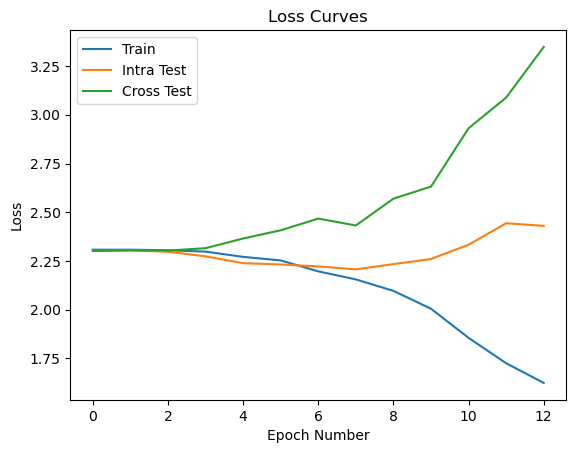

In [5]:
user_res_dict = res_dict_lst[0]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


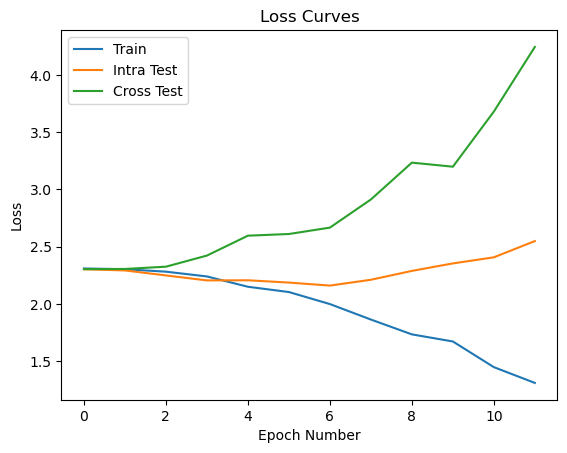

In [7]:
user_res_dict = res_dict_lst[1]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


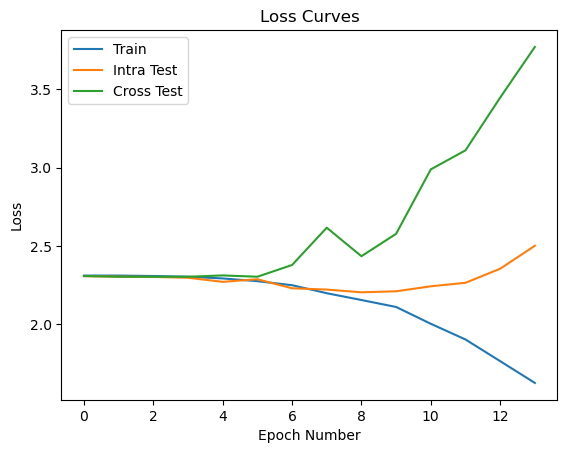

In [8]:
user_res_dict = res_dict_lst[2]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [6]:
# Save the data to a file
## TODO: Ensure this is saving to the correct place
## TODO: This is the saving for the AMC, not for local.
# Need to save the results from local tho...
#print(f'{MY_CONFIG["results_save_dir"]}\\{MY_CONFIG["timestamp"]}')
#print()
#with open(f'{MY_CONFIG["results_save_dir"]}\\{MY_CONFIG["timestamp"]}_{MODEL_STR}_agglo_merge_res.pkl', 'wb') as f:
#    pickle.dump(merge_log, f)
#    pickle.dump(intra_cluster_performance, f)
#    pickle.dump(cross_cluster_performance, f)
#    pickle.dump(nested_clus_model_dict, f)
#print("Data has been saved successfully!")